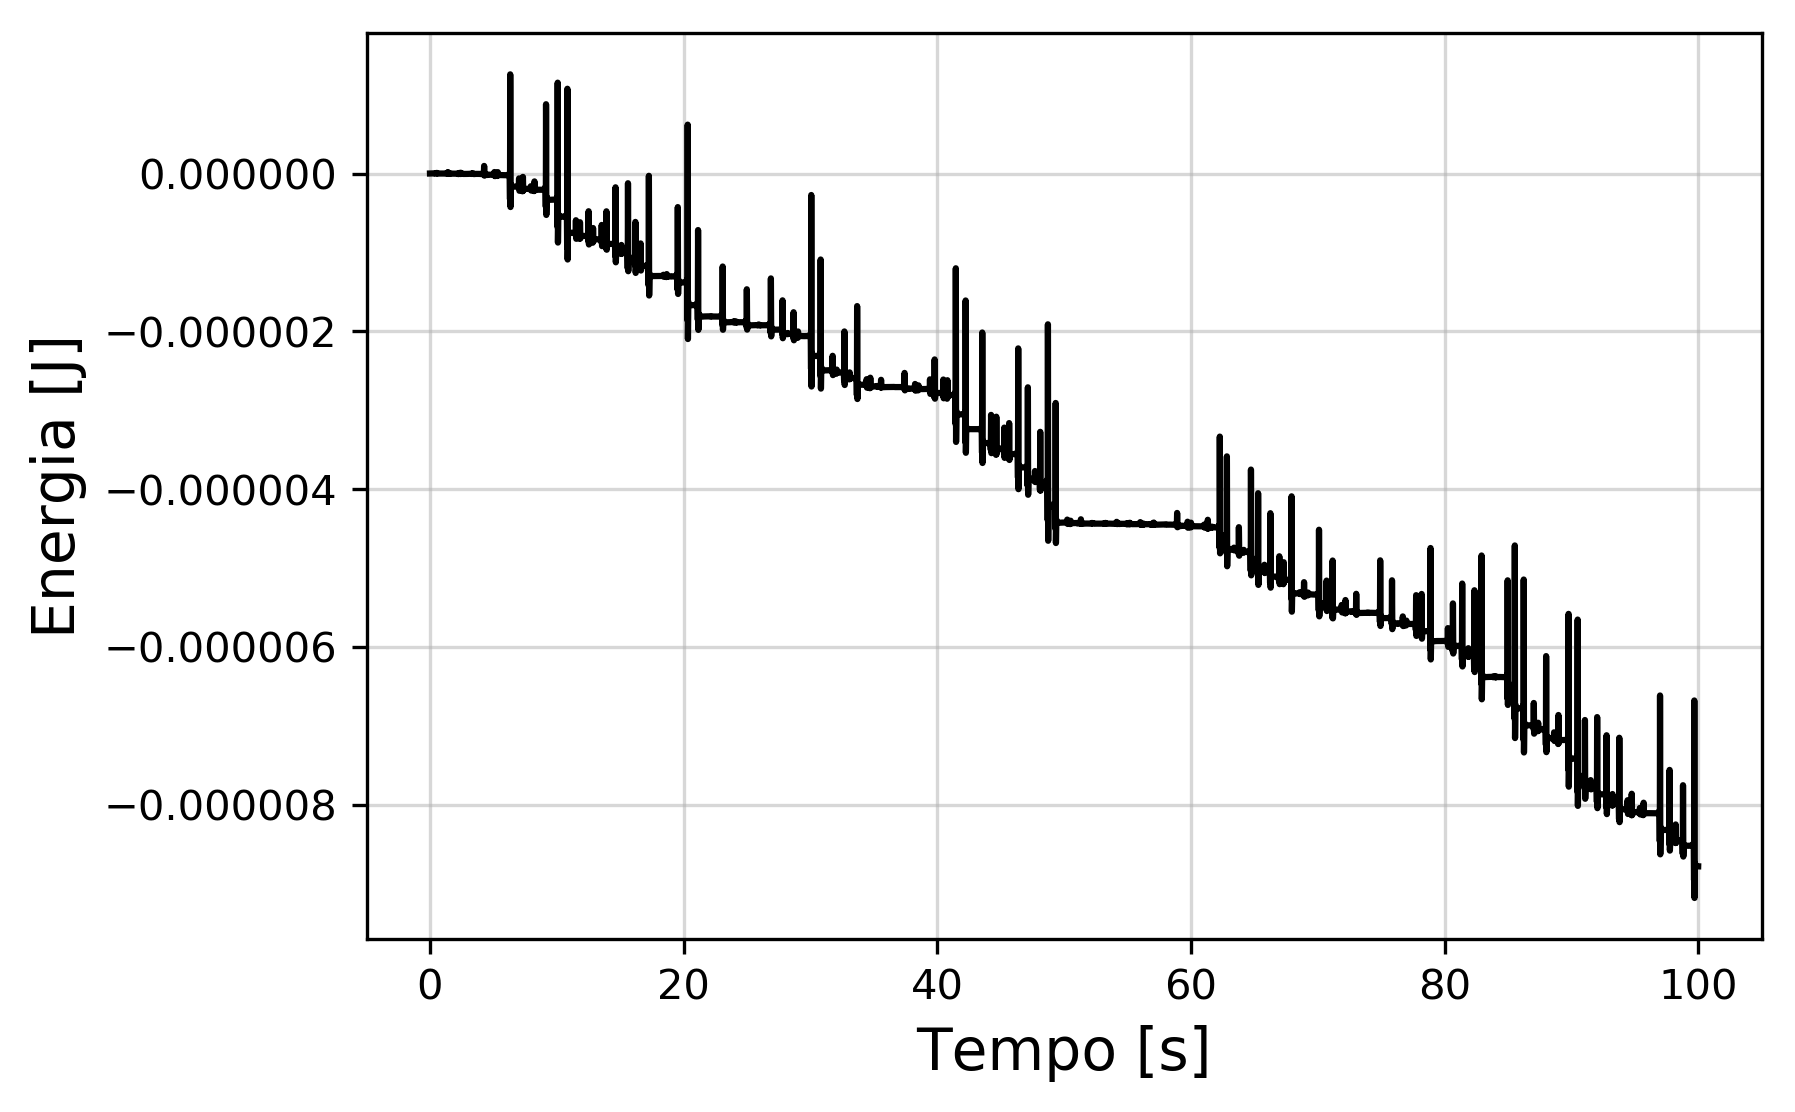

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
l = 0.4  #[m]
m = 1    #[kg]
g = 9.81 #[m/s^2]

#####################################################
#--Função contendo a Lagrangena do movimento de um--#
#--pêndulo duplo reduzida para um sistema com duas--#
#--EDOs de primeira ordem.--------------------------#
#####################################################
def F(p0):
    thet1, thet2 = p0[0]
    omeg1, omeg2 = p0[1]
    
    Dthet1, Dthet2 = omeg1, omeg2

    Domeg1 = -(omeg1**2 * np.sin(2*(thet1 - thet2)) + 2*omeg2**2 *\
               np.sin(thet1 - thet2) + (g/l)*(np.sin(thet1 - 2*thet2)\
                                              + 3*np.sin(thet1)))/(3 - np.cos(2*thet1 - 2*thet2))
    
    Domeg2 = (4*omeg1**2 * np.sin(thet1 - thet2) + omeg2**2\
              * np.sin(2*(thet1 - thet2)) + 2*(g/l)*(np.sin(2*thet1 - thet2)
                                                     - np.sin(thet2)))/(3 - np.cos(2*thet1 - 2*thet2))
    return np.array([[Dthet1, Dthet2],[Domeg1, Domeg2]], float)

# Condições Iniciais
r = np.array([[np.pi/2,np.pi/2],[0,0]], float)
E = np.array([], float)

# Intervalo de tempo
a   = 0
b   = 100
h   = (b-a)/5e4
T   = np.arange(a,b,h)

# Resolução da EDO por meio do RK4, além do calculo da energia total
for t in T:
    thet1, thet2 = r[0]
    omeg1, omeg2 = r[1]
    E_i = m*l**2 * (omeg1**2 + 0.5*omeg2**2 + omeg1*omeg2*np.cos(thet1 - thet2))\
         - m*g*l*(2*np.cos(thet1) + np.cos(thet2))

    E = np.append(E,E_i)
    k1 = h*F(r)
    k2 = h*F(r + 0.5*k1)
    k3 = h*F(r + 0.5*k2)
    k4 = h*F(r + k3)
    r += (k1 + 2*k2 + 2*k3 + k4)/6

# Apresentação do gráfico da evolução temporal da energia total
plt.figure()
plt.plot(T, E,'-k', markersize = 2)
plt.grid(alpha = 0.5)
plt.xlabel('Tempo [s]', size = 14)
plt.ylabel('Energia [J]', size = 14)
plt.show()